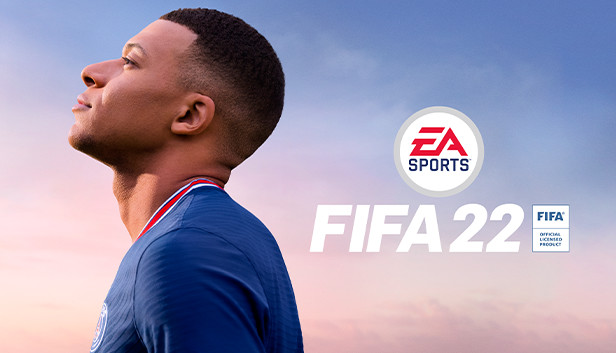

# Handling Missing Values by Using Basic & Fancyimpute Imputations

## Importing dataset & relevant packages

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from fancyimpute import KNN, IterativeImputer
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

fifa_df = pd.read_csv(r'C:\Users\User\Desktop\DataCamp\Python\Projects\Voluntary Projects\9. Fifa 22\Fifa22ConfirmedPlayers.csv')

display(fifa_df.head(5))

,PlayerName,Foot,Position,AWR,DWR,OVR,PAC,SHO,PAS,DRI,DEF,PHY,SM,DIV,POS,HAN,REF,KIC,SPD
0,Pelé,Right,CAM,High,Med,98,95.0,96.0,93.0,96.0,60.0,76.0,5,NaN,NaN,NaN,NaN,NaN,NaN
1,Diego Maradona,Left,CAM,High,Med,97,92.0,93.0,92.0,97.0,40.0,76.0,5,NaN,NaN,NaN,NaN,NaN,NaN
2,Ronaldo,Right,ST,Med,Med,96,97.0,95.0,81.0,95.0,45.0,76.0,5,NaN,NaN,NaN,NaN,NaN,NaN
3,Zinedine Zidane,Right,CAM,Med,Med,96,85.0,92.0,96.0,95.0,75.0,86.0,5,NaN,NaN,NaN,NaN,NaN,NaN
4,Diego Maradona,Left,CAM,High,Med,95,88.0,91.0,90.0,95.0,42.0,75.0,5,NaN,NaN,NaN,NaN,NaN,NaN


Referring to the first five rows of the dataset above, there are many missing values in the last 6 variables. We'll check them out later. First, lets explore our dataset.

## Performing exploratory data analysis (EDA)

In [101]:
print(fifa_df.shape)

(15322, 19)


There are 15,322 observations across 19 variables.

In [102]:
print(fifa_df.dtypes)

PlayerName     object
Foot           object
Position       object
AWR            object
DWR            object
OVR             int64
PAC           float64
SHO           float64
PAS           float64
DRI           float64
DEF           float64
PHY           float64
SM              int64
DIV           float64
POS           float64
HAN           float64
REF           float64
KIC           float64
SPD           float64
dtype: object


The string variables are originally assigned as object data type. We'll convert them into categorical data type for easing our analysis later on.

In [103]:
for i in fifa_df.columns:
    if fifa_df[i].dtypes == 'object':
        fifa_df[i] = fifa_df[i].astype('category')
print(fifa_df.dtypes)

PlayerName    category
Foot          category
Position      category
AWR           category
DWR           category
OVR              int64
PAC            float64
SHO            float64
PAS            float64
DRI            float64
DEF            float64
PHY            float64
SM               int64
DIV            float64
POS            float64
HAN            float64
REF            float64
KIC            float64
SPD            float64
dtype: object


The object data-type variables had been converted into category data-type variables. 

In [104]:
print(fifa_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15322 entries, 0 to 15321
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PlayerName  15322 non-null  category
 1   Foot        15322 non-null  category
 2   Position    15322 non-null  category
 3   AWR         15310 non-null  category
 4   DWR         15310 non-null  category
 5   OVR         15322 non-null  int64   
 6   PAC         13613 non-null  float64 
 7   SHO         13613 non-null  float64 
 8   PAS         13613 non-null  float64 
 9   DRI         13613 non-null  float64 
 10  DEF         13613 non-null  float64 
 11  PHY         13613 non-null  float64 
 12  SM          15322 non-null  int64   
 13  DIV         1709 non-null   float64 
 14  POS         1709 non-null   float64 
 15  HAN         1709 non-null   float64 
 16  REF         1709 non-null   float64 
 17  KIC         1709 non-null   float64 
 18  SPD         1709 non-null   float64 
dtypes: c

According to the above information, there are only 1709 observations out of 15,322 observations that were filled up in the final 6 variables in the dataset. We'll decide on what to do with them. 

In [105]:
print(fifa_df.describe())

                OVR           PAC           SHO           PAS           DRI  \
count  15322.000000  13613.000000  13613.000000  13613.000000  13613.000000   
mean      67.463582     68.818997     54.134136     59.217219     64.256299   
std        7.283252     11.628254     14.605728     10.302823      9.851978   
min       47.000000      0.000000      0.000000      0.000000      0.000000   
25%       63.000000     63.000000     44.000000     53.000000     59.000000   
50%       67.000000     70.000000     56.000000     59.000000     65.000000   
75%       72.000000     77.000000     65.000000     66.000000     70.000000   
max       98.000000     97.000000     96.000000     96.000000     97.000000   

                DEF           PHY            SM          DIV          POS  \
count  13613.000000  13613.000000  15322.000000  1709.000000  1709.000000   
mean      53.244619     66.581797      2.426054    66.359274    64.620246   
std       16.172959      9.531835      0.812438     7.655

It can be roughly deduce that some of the variables might contain several outliers. The analysis will be further carried out by plotting boxplots of the numerical variables. Regarding the last 6 variables of the dataset, they have no direct relationship with the rest of the variables since they are in Fifa Ultimate Team categories which will not affecting the players' attributes. Plus the big amount of missing values they possess, these variables will be dropped. 

In [106]:
fifa_df = fifa_df.drop(['DIV','POS','HAN','REF','KIC','SPD'], axis = 1)
display(fifa_df.head())

,PlayerName,Foot,Position,AWR,DWR,OVR,PAC,SHO,PAS,DRI,DEF,PHY,SM
0,Pelé,Right,CAM,High,Med,98,95.0,96.0,93.0,96.0,60.0,76.0,5
1,Diego Maradona,Left,CAM,High,Med,97,92.0,93.0,92.0,97.0,40.0,76.0,5
2,Ronaldo,Right,ST,Med,Med,96,97.0,95.0,81.0,95.0,45.0,76.0,5
3,Zinedine Zidane,Right,CAM,Med,Med,96,85.0,92.0,96.0,95.0,75.0,86.0,5
4,Diego Maradona,Left,CAM,High,Med,95,88.0,91.0,90.0,95.0,42.0,75.0,5


Some variables' names were written as abbreviation names. It can be hardly to understand what these variables represent for. Therefore, they will be renamed accordingly. 

In [107]:
fifa_df.columns = ['Player Name','Foot','Position','Attacking Work Rate','Defensive Work Rate','Overall','Pace','Shooting','Passing','Dribbling','Defence','Physical','Skill Moves']
print(fifa_df.columns)

Index(['Player Name', 'Foot', 'Position', 'Attacking Work Rate',
       'Defensive Work Rate', 'Overall', 'Pace', 'Shooting', 'Passing',
       'Dribbling', 'Defence', 'Physical', 'Skill Moves'],
      dtype='object')


The variables had been renamed accordingly. Lets see the results.

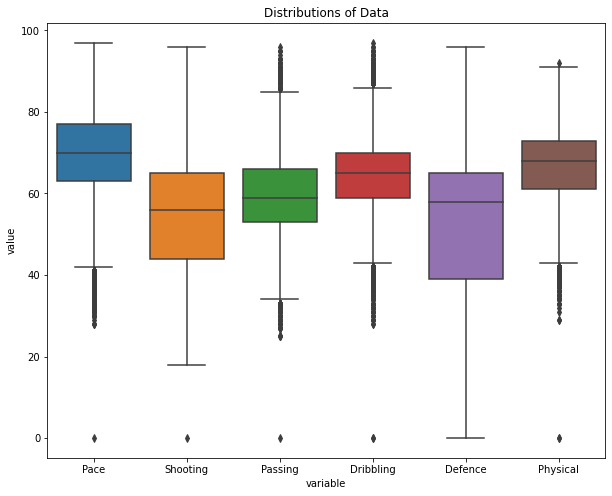

In [108]:
fifa_df_numeric = fifa_df.filter(['Pace','Shooting','Passing','Dribbling','Defence','Physical'])
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(fifa_df_numeric))
ax.set_title('Distributions of Data')
plt.show()

It can be seen that there are many outliers existed in the existing dataset. Thus, the imputation of the missing values by the mean value in each variable is not good since they can be biased in the future analysis. Thus, mean imputation technique will be excluded.

In [109]:
display(fifa_df.head())

,Player Name,Foot,Position,Attacking Work Rate,Defensive Work Rate,Overall,Pace,Shooting,Passing,Dribbling,Defence,Physical,Skill Moves
0,Pelé,Right,CAM,High,Med,98,95.0,96.0,93.0,96.0,60.0,76.0,5
1,Diego Maradona,Left,CAM,High,Med,97,92.0,93.0,92.0,97.0,40.0,76.0,5
2,Ronaldo,Right,ST,Med,Med,96,97.0,95.0,81.0,95.0,45.0,76.0,5
3,Zinedine Zidane,Right,CAM,Med,Med,96,85.0,92.0,96.0,95.0,75.0,86.0,5
4,Diego Maradona,Left,CAM,High,Med,95,88.0,91.0,90.0,95.0,42.0,75.0,5


Now the variables had been renamed. Unfortunately, it can be seen that there is a duplicate of Diego Maradona in the dataset (refer index 1 & 4). There might be more duplicates in the dataset. Lets find out.

In [110]:
print(fifa_df.shape[0] - fifa_df['Player Name'].nunique())

396


There are 396 duplicates in the dataset. To avoid redundancy in our analysis, these duplicates will be dropped entirely.

In [111]:
#There are 396 duplicated players in the dataframe, lets drop them
fifa_df.drop_duplicates(subset = ['Player Name'], inplace = True)
print(fifa_df.shape)

(14926, 13)


The duplicates had been dropped. Alongside the initial dropping of the last 6 variables in the original dataset, there are 14,926 observations with their respective 13 variables left. If we refer to the previous information of the dataset, there are several variables left that contains missing values. These variables contain a fraction of missing values and they might be too beneficial for the analysis to be dropped. Lets take a look at the distributions of these missing values. 

## Visualizing missing values

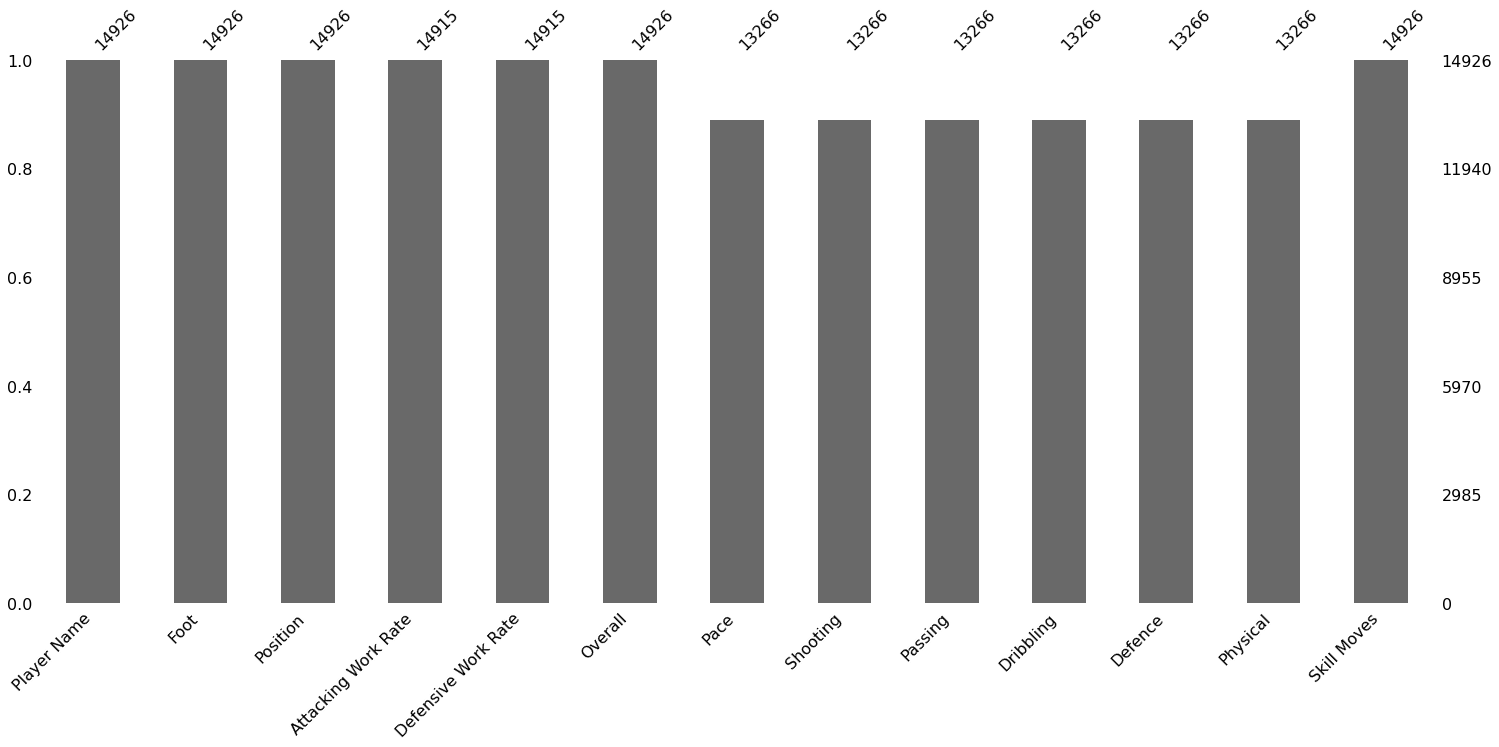

In [112]:
msno.bar(fifa_df)

There are 6 numerical variables that contain missing values whereas there are 2 categorical variables that contain 11 missing values each. These missing values are uniformly distributed across different variables.

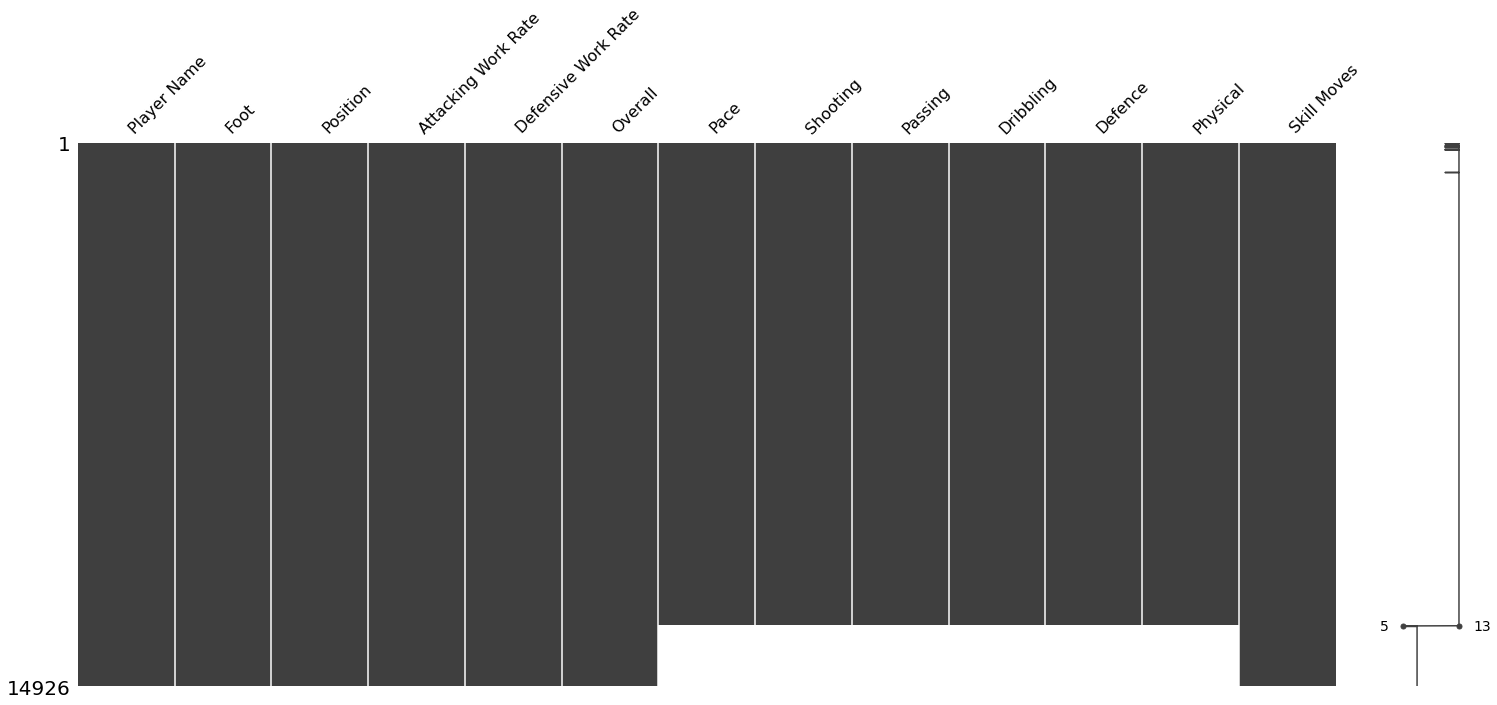

In [113]:
msno.matrix(fifa_df)

Referring to their patterns of missingness, they can be categorized as Missing Not at Random (MNAR). They would be too beneficial for the analysis to be dropped. Therefore, they have to be imputed with the appropriate imputation technique. Before that, lets see their correlation with the other numerical variables.

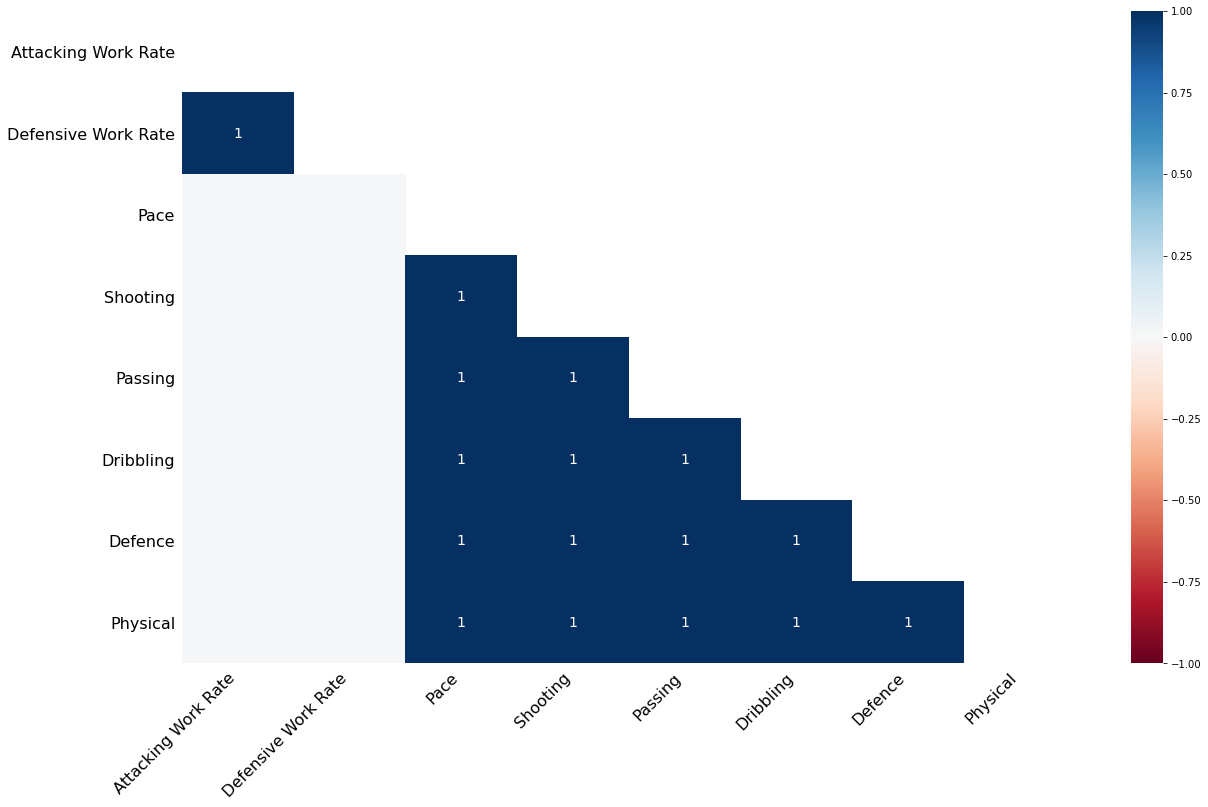

In [114]:
msno.heatmap(fifa_df)

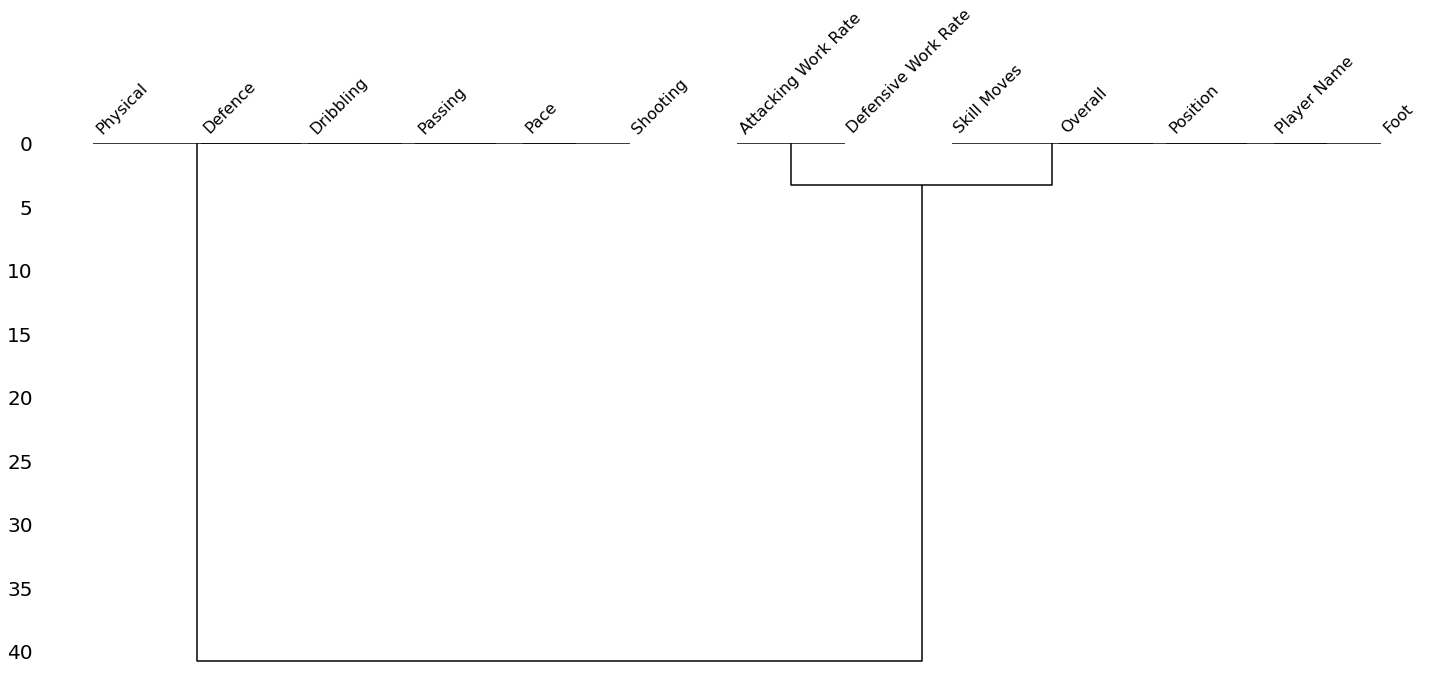

In [115]:
msno.dendrogram(fifa_df)

It looks like the variables that contain these missing values are highly correlated. 

In [116]:
#Copy fifa_df to fifa_df_knn
fifa_df_copy = fifa_df.copy(deep = True)

#Drop the Player Name variable from the newly-created dataframe
fifa_df_copy = fifa_df_copy.drop(['Player Name'], axis = 1)

## Fill missing values by using Fancyimpute K-Nearest Neighbor (KNN)

One missing values imputation technique that will be used is KNN fancyimpute. This technique requires categorical variables to be converted to numerical variables. pd.get_dummies will be carried out to perform this operation. 

In [117]:
fifa_df_copy = pd.get_dummies(fifa_df_copy)
pd.set_option('display.max_columns', None)
display(fifa_df_copy.head(10))

,Overall,Pace,Shooting,Passing,Dribbling,Defence,Physical,Skill Moves,Foot_Left,Foot_Right,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LB,Position_LF,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RF,Position_RM,Position_RW,Position_RWB,Position_ST,Attacking Work Rate_High,Attacking Work Rate_Low,Attacking Work Rate_Med,Defensive Work Rate_High,Defensive Work Rate_Low,Defensive Work Rate_Med
0,98,95.0,96.0,93.0,96.0,60.0,76.0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,97,92.0,93.0,92.0,97.0,40.0,76.0,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,96,97.0,95.0,81.0,95.0,45.0,76.0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,96,85.0,92.0,96.0,95.0,75.0,86.0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
6,94,91.0,96.0,91.0,92.0,46.0,76.0,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7,94,91.0,92.0,91.0,94.0,42.0,73.0,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8,94,90.0,87.0,94.0,96.0,41.0,68.0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
9,94,86.0,56.0,75.0,69.0,96.0,83.0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
10,94,92.0,90.0,91.0,95.0,37.0,81.0,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
13,93,90.0,66.0,81.0,86.0,90.0,87.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [118]:
fifa_df_KNN = fifa_df_copy.copy(deep = True)
KNN_imputer = KNN()
fifa_df_KNN.iloc[:, :] = KNN_imputer.fit_transform(fifa_df_KNN)

Imputing row 1/14926 with 0 missing, elapsed time: 49.753
Imputing row 101/14926 with 0 missing, elapsed time: 49.832
Imputing row 201/14926 with 0 missing, elapsed time: 49.846
Imputing row 301/14926 with 0 missing, elapsed time: 49.846
Imputing row 401/14926 with 0 missing, elapsed time: 49.846
Imputing row 501/14926 with 0 missing, elapsed time: 49.846
Imputing row 601/14926 with 0 missing, elapsed time: 49.848
Imputing row 701/14926 with 0 missing, elapsed time: 49.849
Imputing row 801/14926 with 0 missing, elapsed time: 49.849
Imputing row 901/14926 with 0 missing, elapsed time: 49.854
Imputing row 1001/14926 with 0 missing, elapsed time: 49.855
Imputing row 1101/14926 with 0 missing, elapsed time: 49.855
Imputing row 1201/14926 with 0 missing, elapsed time: 49.855
Imputing row 1301/14926 with 0 missing, elapsed time: 49.855
Imputing row 1401/14926 with 0 missing, elapsed time: 49.859
Imputing row 1501/14926 with 0 missing, elapsed time: 49.859
Imputing row 1601/14926 with 0 missi

The missing values have been imputed by using fancyimpute KNN technique. Lets see if there is any missing value left in the dataframe.

In [119]:
print(fifa_df_KNN.isnull().sum())

Overall                     0
Pace                        0
Shooting                    0
Passing                     0
Dribbling                   0
Defence                     0
Physical                    0
Skill Moves                 0
Foot_Left                   0
Foot_Right                  0
Position_CAM                0
Position_CB                 0
Position_CDM                0
Position_CF                 0
Position_CM                 0
Position_GK                 0
Position_LB                 0
Position_LF                 0
Position_LM                 0
Position_LW                 0
Position_LWB                0
Position_RB                 0
Position_RF                 0
Position_RM                 0
Position_RW                 0
Position_RWB                0
Position_ST                 0
Attacking Work Rate_High    0
Attacking Work Rate_Low     0
Attacking Work Rate_Med     0
Defensive Work Rate_High    0
Defensive Work Rate_Low     0
Defensive Work Rate_Med     0
dtype: int

Well done! There's no missing value left in the dataframe. However, it is wise to compare the KNN computations with other computation techniques through density plots. Density plots explain the distribution in the data. It is a very good metric to check bias in the imputations.

## Fill missing values by using Fancyimpute Multiple Imputations by Chained Equations (MICE)

In [120]:
fifa_df_MICE = fifa_df_copy.copy(deep = True)
MICE_imputer = IterativeImputer()
fifa_df_MICE.iloc[:, :] = MICE_imputer.fit_transform(fifa_df_MICE)

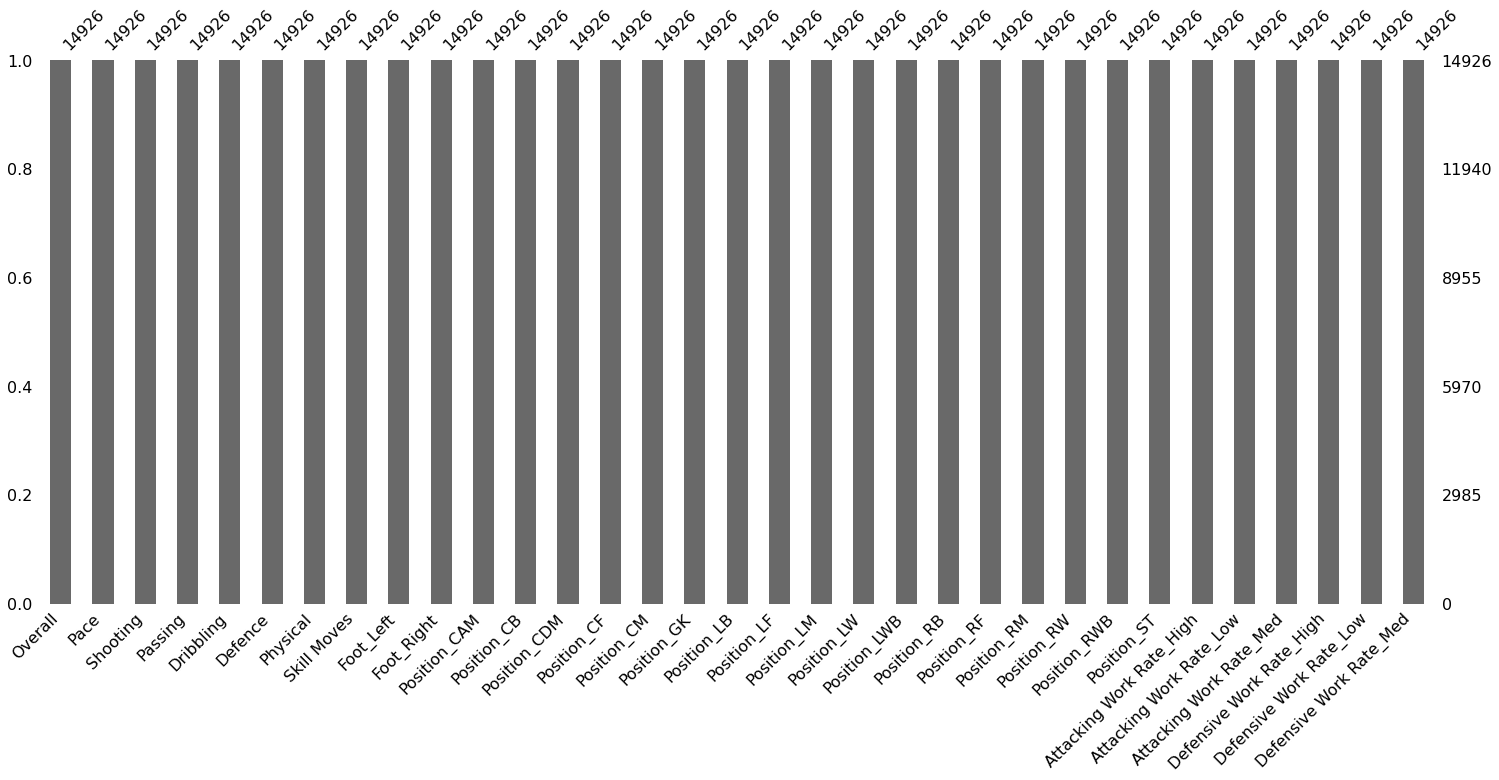

In [121]:
msno.bar(fifa_df_MICE)

## Fill missing values by using basic imputation techniques (Constant, Median, Mode)

In [122]:
fifa_df_constant = fifa_df_copy.copy(deep = True)
constant_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
fifa_df_constant.iloc[:, :] = constant_imputer.fit_transform(fifa_df_constant)

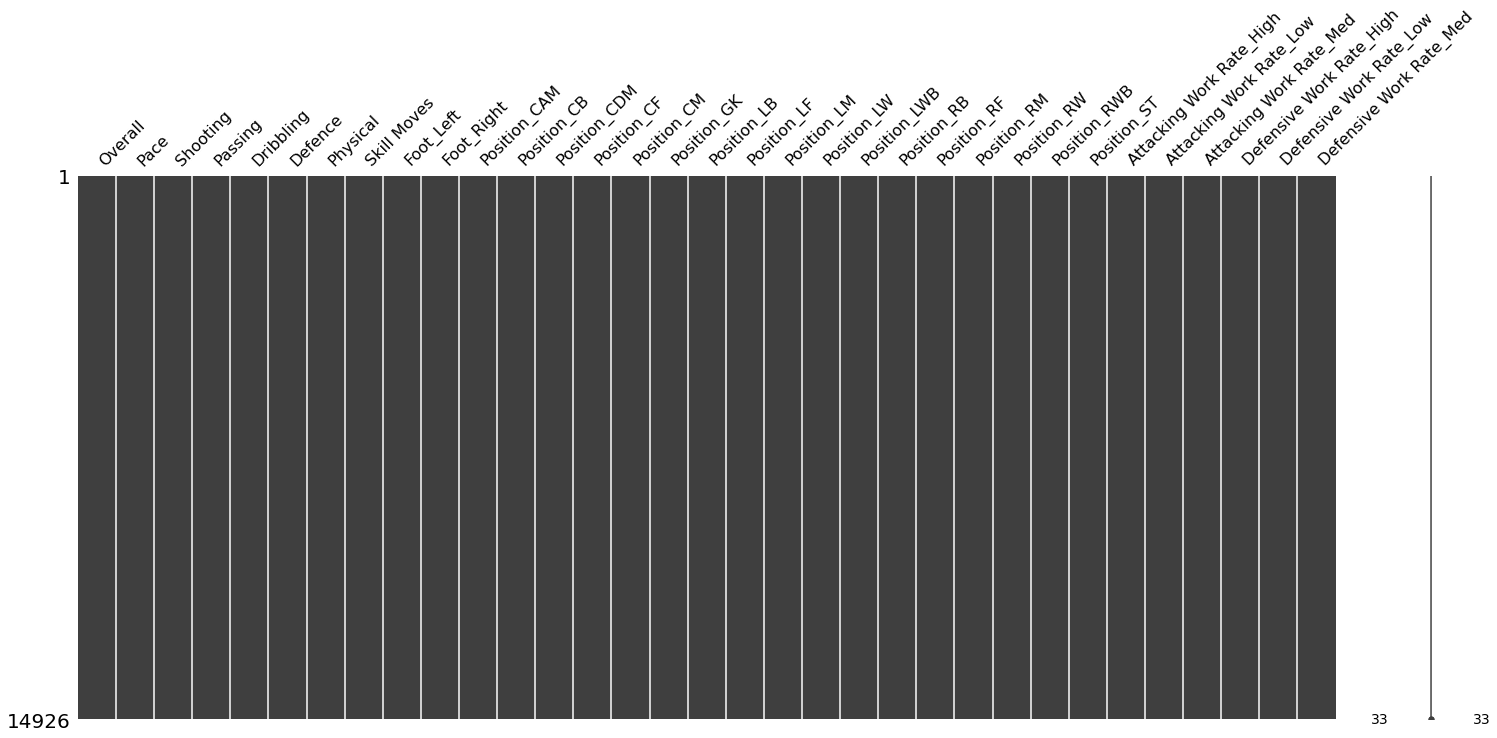

In [123]:
msno.matrix(fifa_df_constant)

Its good to see that all missing values have been filled with constant 0 values. But, is it the best method to impute the missing values?

In [124]:
fifa_df_median = fifa_df_copy.copy(deep = True)
median_imputer = SimpleImputer(strategy = 'median')
fifa_df_median.iloc[:, :] = median_imputer.fit_transform(fifa_df_median)

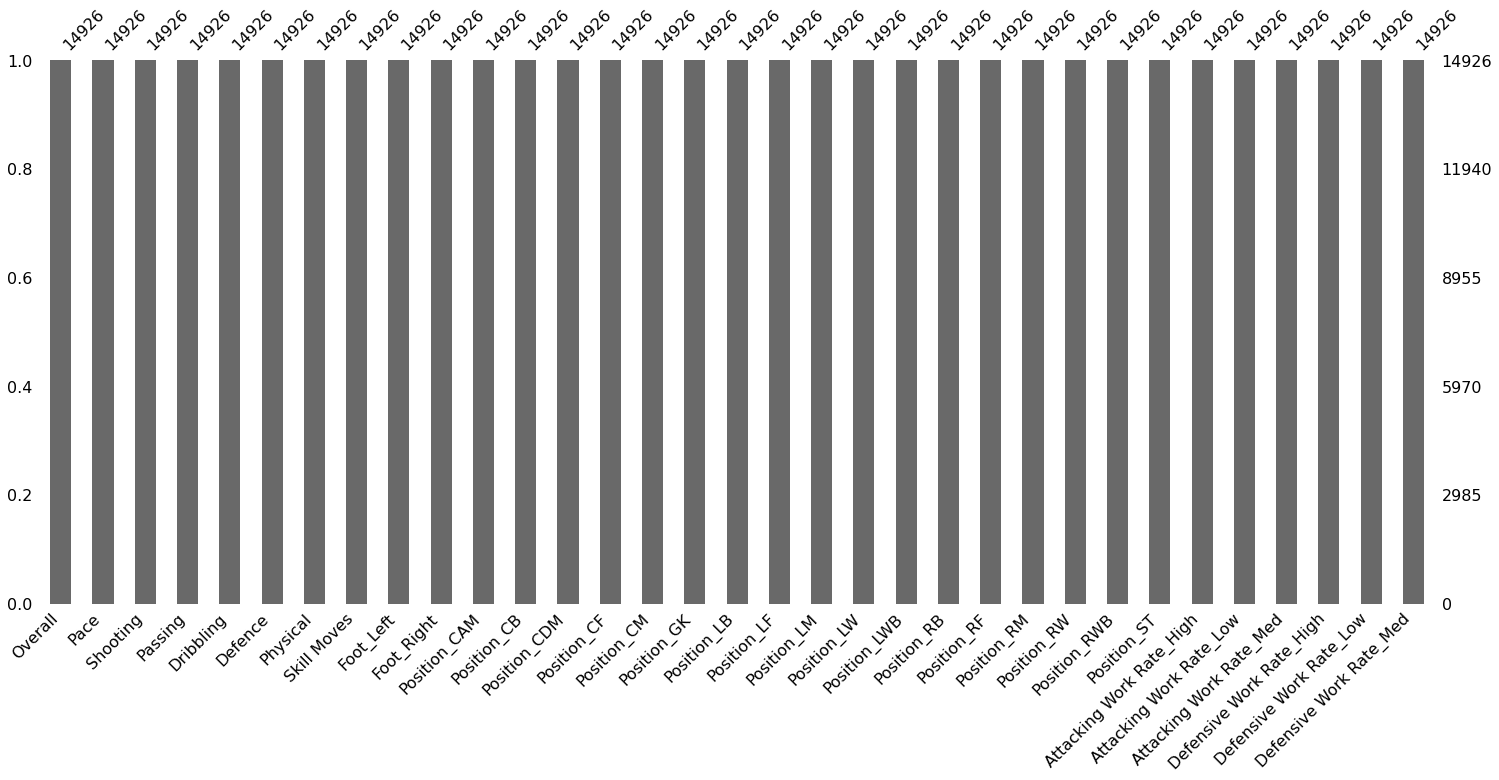

In [125]:
msno.bar(fifa_df_median)

Lets take a look at the last imputation technique which is mode or most frequent.

In [126]:
fifa_df_mode = fifa_df_copy.copy(deep = True)
mode_imputer = SimpleImputer(strategy = 'most_frequent')
fifa_df_mode.iloc[:, :] = mode_imputer.fit_transform(fifa_df_mode)

In [127]:
fifa_df_mode.isnull().sum()

Overall                     0
Pace                        0
Shooting                    0
Passing                     0
Dribbling                   0
Defence                     0
Physical                    0
Skill Moves                 0
Foot_Left                   0
Foot_Right                  0
Position_CAM                0
Position_CB                 0
Position_CDM                0
Position_CF                 0
Position_CM                 0
Position_GK                 0
Position_LB                 0
Position_LF                 0
Position_LM                 0
Position_LW                 0
Position_LWB                0
Position_RB                 0
Position_RF                 0
Position_RM                 0
Position_RW                 0
Position_RWB                0
Position_ST                 0
Attacking Work Rate_High    0
Attacking Work Rate_Low     0
Attacking Work Rate_Med     0
Defensive Work Rate_High    0
Defensive Work Rate_Low     0
Defensive Work Rate_Med     0
dtype: int

## Visualization of Imputations

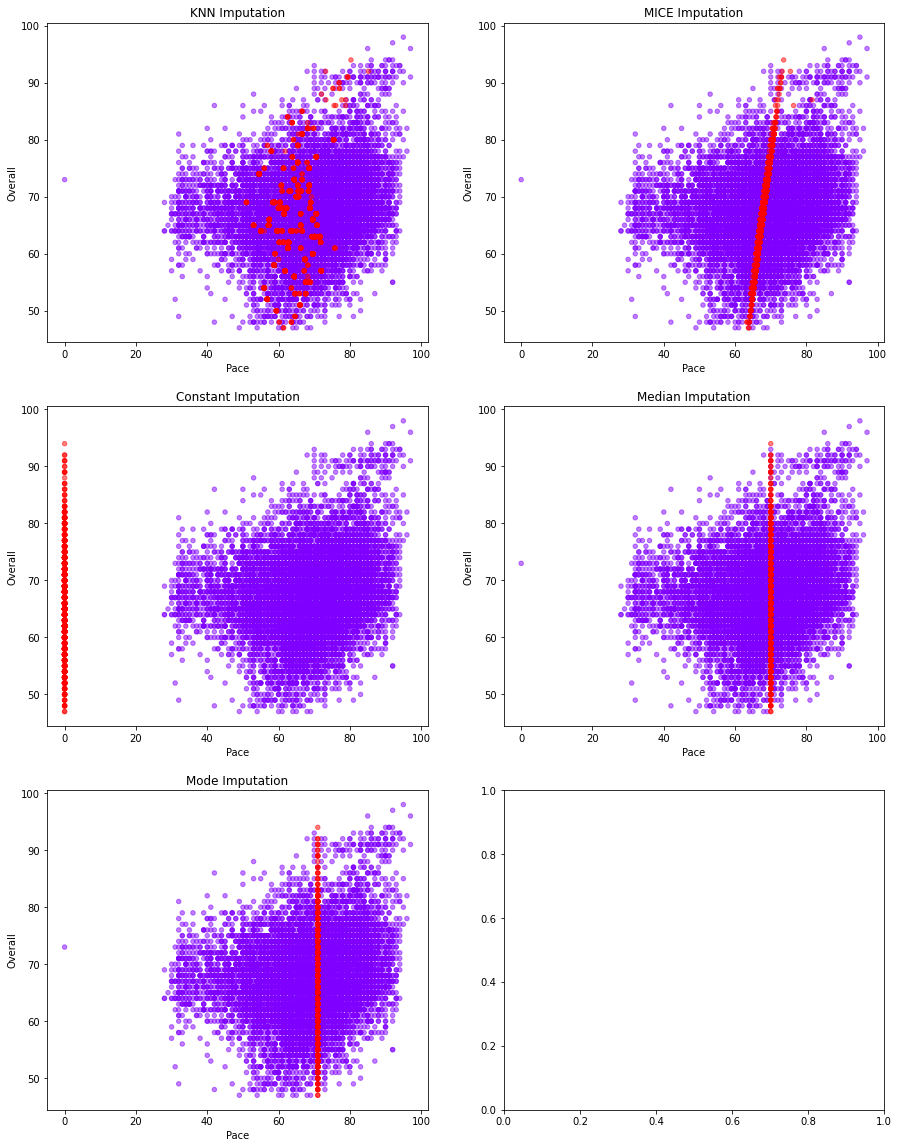

In [128]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 20))
nullity = fifa_df_copy['Pace'].isnull() | fifa_df_copy['Overall'].isnull()
imputations = {'KNN Imputation':fifa_df_KNN, 'MICE Imputation':fifa_df_MICE, 'Constant Imputation':fifa_df_constant, 'Median Imputation':fifa_df_median, 'Mode Imputation':fifa_df_mode}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x = 'Pace', y = 'Overall', kind = 'scatter', alpha = 0.5, c = nullity, cmap = 'rainbow', ax = ax, colorbar = False, title = df_key)

The red dots are the imputed values which previously are the missing values of the Pace variable. Referring to each plot, only the red dots in both KNN Imputation and MICE Imputation that show the correlation between Pace and Overall variables. The red dots of the other imputation techniques show no correlation and they would induce bias in the dataset.   

## Evaluation of different evaluation techniques

In [129]:
#Create a baseline linear model to compare against imputated models
fifa_df_cc = fifa_df_copy.dropna(how = 'any')
X = sm.add_constant(fifa_df_cc.iloc[:, 1:])
y = fifa_df_cc['Overall']
lm = sm.OLS(y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     2350.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:06:49   Log-Likelihood:                -32365.
No. Observations:               13266   AIC:                         6.479e+04
Df Residuals:                   13237   BIC:                         6.500e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [130]:
#R-squared of the baseline model
lm.rsquared_adj

0.8321798885887339

lm.rsquared_adj is used to obtain R-squared. R-squared measures the accuracy of machine learning model.

In [131]:
#Coefficients of the baseline model
lm.params

const                       1.047184e+01
Pace                        6.228462e-03
Shooting                    5.764438e-02
Passing                     1.881681e-01
Dribbling                   3.594385e-01
Defence                     1.350227e-01
Physical                    1.523132e-01
Skill Moves                 7.288841e-01
Foot_Left                   5.125023e+00
Foot_Right                  5.346819e+00
Position_CAM               -3.617355e-01
Position_CB                 5.040356e+00
Position_CDM               -1.163246e+00
Position_CF                 1.435403e+00
Position_CM                -3.139237e+00
Position_GK                -5.554204e-15
Position_LB                 1.153547e-01
Position_LF                 1.460545e+00
Position_LM                 9.110975e-01
Position_LW                 1.402832e+00
Position_LWB               -2.705718e-01
Position_RB                 2.559410e-01
Position_RF                -6.667701e-01
Position_RM                 7.485366e-01
Position_RW     

lm.params is used to obtain coefficients. The coefficients explain the weights of the different variables in the dataframe. Now lets fit linear model on the different imputed dataframes.

In [132]:
#Create imputated linear models
#KNN Imputation
X = sm.add_constant(fifa_df_KNN.iloc[:, 1:])
y = fifa_df_copy['Overall']
lm_KNN = sm.OLS(y, X).fit()
#MICE Imputation
X = sm.add_constant(fifa_df_MICE.iloc[:, 1:])
lm_MICE = sm.OLS(y, X).fit()
#Constant Imputation
X = sm.add_constant(fifa_df_constant.iloc[:, 1:])
lm_constant = sm.OLS(y, X).fit()
#Median Imputation
X = sm.add_constant(fifa_df_median.iloc[:, 1:])
lm_median = sm.OLS(y, X).fit()
#Mode Imputation
X = sm.add_constant(fifa_df_mode.iloc[:, 1:])
lm_mode = sm.OLS(y, X).fit()

Now lets compare the R-squared values of different imputations.

In [133]:
display(pd.DataFrame({'Baseline':lm.rsquared_adj, 'KNN':lm_KNN.rsquared_adj, 'MICE':lm_MICE.rsquared_adj, 'Constant':lm_constant.rsquared_adj, 'Median':lm_median.rsquared_adj, 'Mode':lm_mode.rsquared_adj}, index = ['R_squared_adj']))

,Baseline,KNN,MICE,Constant,Median,Mode
R_squared_adj,0.83218,0.839841,0.848579,0.72417,0.72417,0.72417


MICE imputation model achieves the highest R-squared value hence the highest accuracy of machine learning model followed by the KNN imputation model. The Baseline model achieves one of the highest R-squared value since many rows with missing values have been dropped for fitting the linear model. The other basic imputation models obtain lower R-squared values because they impute the same values throughout columns, respectively.

In [134]:
display(pd.DataFrame({'Baseline':lm.params, 'KNN':lm_KNN.params, 'MICE':lm_MICE.params, 'Constant':lm_constant.params, 'Median':lm_median.params, 'Mode':lm_mode.params}))

,Baseline,KNN,MICE,Constant,Median,Mode
const,1.047184e+01,9.080722,8.244311,15.522804,13.405472,13.331968
Pace,6.228462e-03,0.005348,0.006631,0.006017,0.006017,0.006017
Shooting,5.764438e-02,0.044617,0.060304,0.057675,0.057675,0.057675
Passing,1.881681e-01,0.189398,0.197038,0.185760,0.185760,0.185760
Dribbling,3.594385e-01,0.361832,0.376402,0.358272,0.358272,0.358272
Defence,1.350227e-01,0.171501,0.141307,0.135313,0.135313,0.135313
Physical,1.523132e-01,0.162267,0.159405,0.152391,0.152391,0.152391
Skill Moves,7.288841e-01,0.640068,0.460028,0.774836,0.774836,0.774836
Foot_Left,5.125023e+00,4.455809,4.014715,7.746321,6.687655,6.650903
Foot_Right,5.346819e+00,4.624913,4.229597,7.776484,6.717818,6.681066


The columns Pace, Shooting, Passing, Dribbling, Defence, Physical, Attacking Work Rate and Defensive Work Rate show that the imputed values add more weights to reinforce these features in the imputations. Now lets compare their density plots. 

Note: Density plots are used to check which imputation most resembles the original dataset and does not introduce a bias.

Text(0.5, 0, 'Shooting')

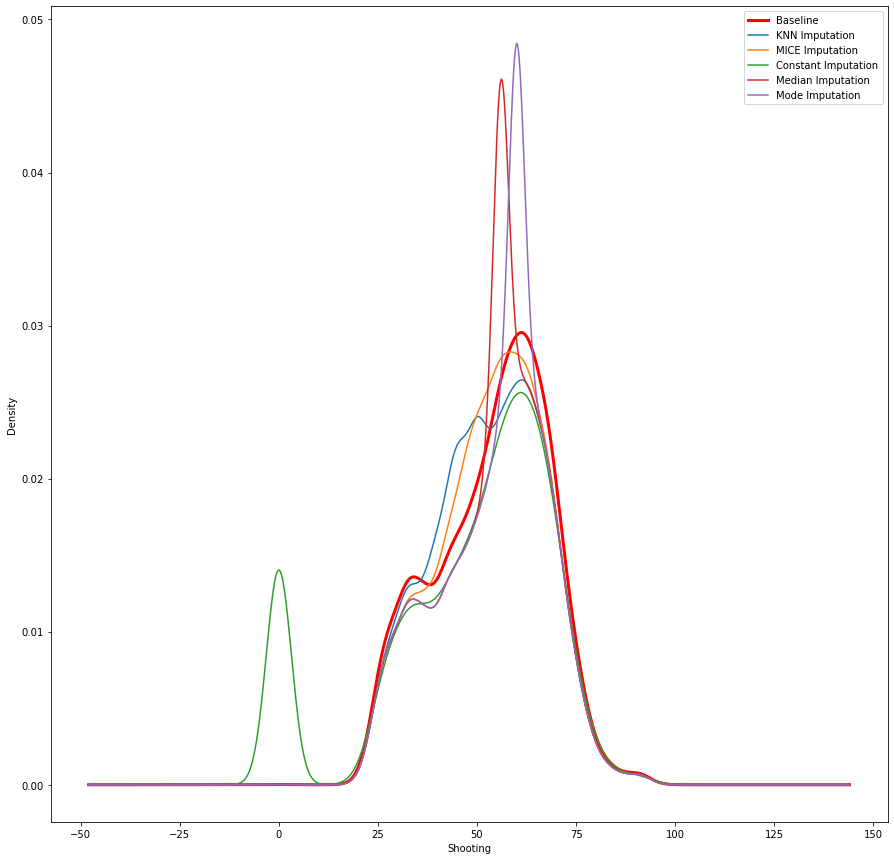

In [135]:
fig, ax = plt.subplots(figsize = (15, 15))
fifa_df_cc['Shooting'].plot(kind = 'kde', c = 'red', linewidth = 3)
fifa_df_KNN['Shooting'].plot(kind = 'kde')
fifa_df_MICE['Shooting'].plot(kind = 'kde')
fifa_df_constant['Shooting'].plot(kind = 'kde')
fifa_df_median['Shooting'].plot(kind = 'kde')
fifa_df_mode['Shooting'].plot(kind = 'kde')

labels = ['Baseline', 'KNN Imputation', 'MICE Imputation', 'Constant Imputation', 'Median Imputation', 'Mode Imputation']
plt.legend(labels)
plt.xlabel('Shooting')

Referring to the density plots above, constant, mean, median and mode imputations are all out of shape as compared to the baseline dataframe. Both KNN and MICE imputations are much more identical to the baseline dataframe. MICE imputation is the most identical. Thus, together with the results of its R-squared values and coefficients, MICE imputation is the most suitable imputation technique to be used in this dataframe.

## Lets see the chosen MICE imputation technique in action

In [136]:
fifa_df_MICE['Player Name'] = fifa_df['Player Name']
fifa_df_MICE = fifa_df_MICE.set_index('Player Name')
display(fifa_df_MICE.head(10))

,Overall,Pace,Shooting,Passing,Dribbling,Defence,Physical,Skill Moves,Foot_Left,Foot_Right,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LB,Position_LF,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RF,Position_RM,Position_RW,Position_RWB,Position_ST,Attacking Work Rate_High,Attacking Work Rate_Low,Attacking Work Rate_Med,Defensive Work Rate_High,Defensive Work Rate_Low,Defensive Work Rate_Med
Player Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pelé,98.0,95.0,96.0,93.0,96.0,60.0,76.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Diego Maradona,97.0,92.0,93.0,92.0,97.0,40.0,76.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Ronaldo,96.0,97.0,95.0,81.0,95.0,45.0,76.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Zinedine Zidane,96.0,85.0,92.0,96.0,95.0,75.0,86.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Ferenc Puskás,94.0,91.0,96.0,91.0,92.0,46.0,76.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Johan Cruyff,94.0,91.0,92.0,91.0,94.0,42.0,73.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Mané Garrincha,94.0,90.0,87.0,94.0,96.0,41.0,68.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Paolo Maldini,94.0,86.0,56.0,75.0,69.0,96.0,83.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Ronaldinho,94.0,92.0,90.0,91.0,95.0,37.0,81.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
